# Penerapan **Collaborative Filtering Algorithm** dengan TensorFlow

Dalam video ini, kita akan melihat bagaimana menggunakan **TensorFlow** untuk mengimplementasikan **collaborative filtering algorithm**. Mungkin Anda sering berpikir bahwa **TensorFlow** hanya digunakan untuk membangun **neural networks**. Dan memang benar, **TensorFlow** adalah alat yang hebat untuk **neural networks**, namun ternyata juga bisa digunakan untuk membangun jenis algoritma pembelajaran lainnya, seperti **collaborative filtering**.

Salah satu alasan saya suka menggunakan **TensorFlow** untuk hal ini adalah karena, pada banyak aplikasi, untuk mengimplementasikan **gradient descent**, Anda perlu mencari **derivatives** dari **cost function**. Namun, **TensorFlow** secara otomatis dapat menghitung **derivatives** tersebut untuk Anda. Yang perlu Anda lakukan hanya mengimplementasikan **cost function**, tanpa perlu mengetahui **calculus** atau menghitung **derivatives** sendiri. Dengan beberapa baris kode, Anda bisa mendapatkan **derivatives** yang bisa digunakan untuk mengoptimalkan **cost function**.

Mari kita lihat bagaimana cara kerjanya.

## Penjelasan Singkat

Anda mungkin ingat diagram berikut dari pelajaran sebelumnya, saat kita membahas tentang optimisasi **w**. Saat itu, kita menetapkan **b=0**, sehingga model kita memprediksi **f(x)=w.x** dan kita ingin mencari nilai **w** yang meminimalkan **cost function J**. Metode yang kita gunakan adalah **gradient descent** yang berulang kali memperbarui **w** sebagai **w - α*(derivative)**.

Kadang, menghitung **derivatives** atau **partial derivatives** bisa jadi sulit. **TensorFlow** membantu dalam hal ini.

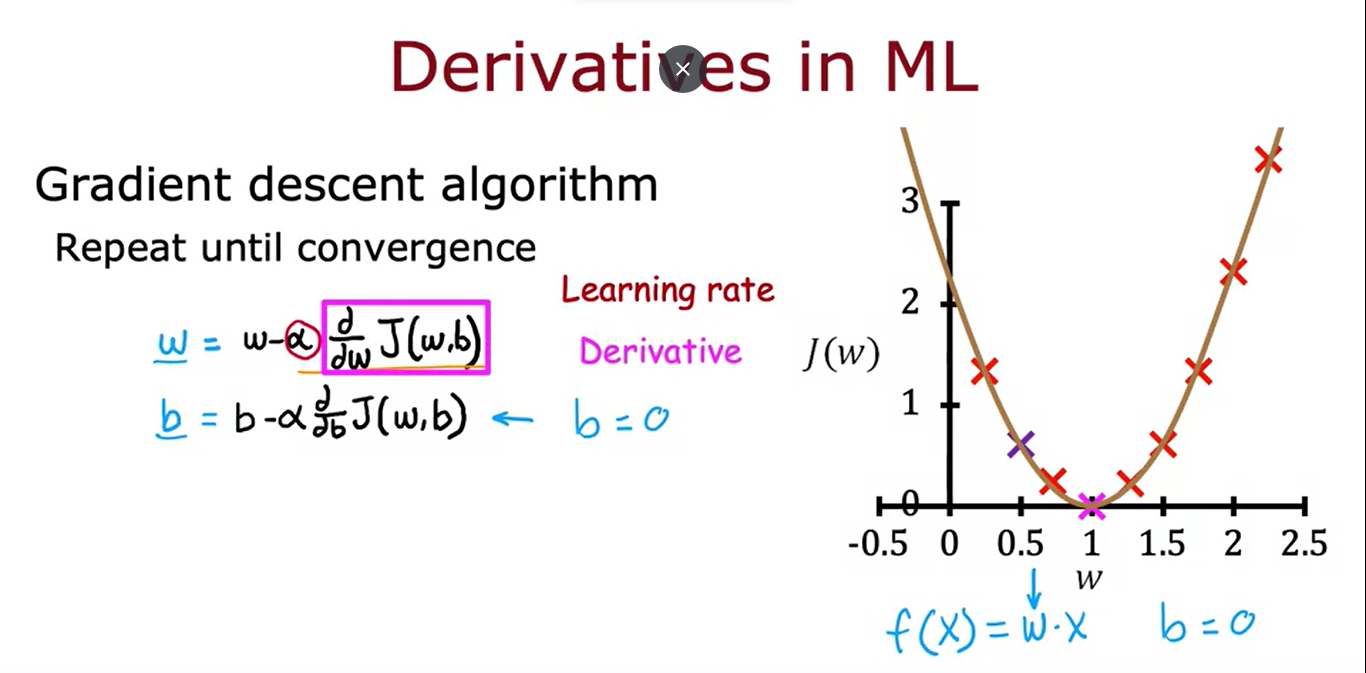

## Contoh Implementasi

Saya akan menggunakan **cost function sederhana**:  
**J = (wx - 1)^2**

Dengan ini, **wx** adalah **f(w,x)** yang disederhanakan, dan **y** bernilai 1. Jadi, algoritma **gradient descent** akan terus mengulang pembaruan hingga konvergen. Jika Anda mengimplementasikan **cost function J**, **TensorFlow** dapat otomatis menghitung **derivative** yang diperlukan untuk menjalankan **gradient descent**.

### Kode TensorFlow

```python
w = tf.Variable(3.0)  # Inisialisasi parameter w
x = 1.0
y = 1.0
alpha = 0.01  # Learning rate
iterations = 30

for iter in range(iterations):
    with tf.GradientTape() as tape:
        f_x = w * x
        J = (f_x - y) ** 2  # Cost function
    
    dJ_dw = tape.gradient(J, w)  # Menghitung derivative
    w.assign_sub(alpha * dJ_dw)  # Memperbarui w

```

Kode di atas menunjukkan bagaimana TensorFlow menggunakan fitur Gradient Tape untuk merekam urutan operasi, menghitung cost function, dan mendapatkan derivatives secara otomatis. Pada akhirnya, kita memperbarui w dengan *w - α(derivative)**.

Collaborative Filtering dengan TensorFlow
Untuk mengimplementasikan collaborative filtering dengan TensorFlow, kita bisa memanfaatkan Auto Diff dan algoritma optimasi yang lebih kuat seperti Adam Optimizer.

Berikut sintaks dasar untuk Adam Optimizer:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
Selanjutnya, kita lakukan iterasi serupa dengan sebelumnya, namun dengan memperhitungkan parameter x, w, b, serta regularization parameter lambda:

``` python
for iter in range(200):
    with tf.GradientTape() as tape:
        J = ...  # Menghitung cost function
        
    grads = tape.gradient(J, [x, w, b])
    optimizer.apply_gradients(zip(grads, [x, w, b]))

```

Di sini, TensorFlow akan otomatis menghitung derivatives dari cost function terhadap x, w, b, lalu menggunakan Adam Optimizer untuk memperbarui nilai-nilai tersebut.

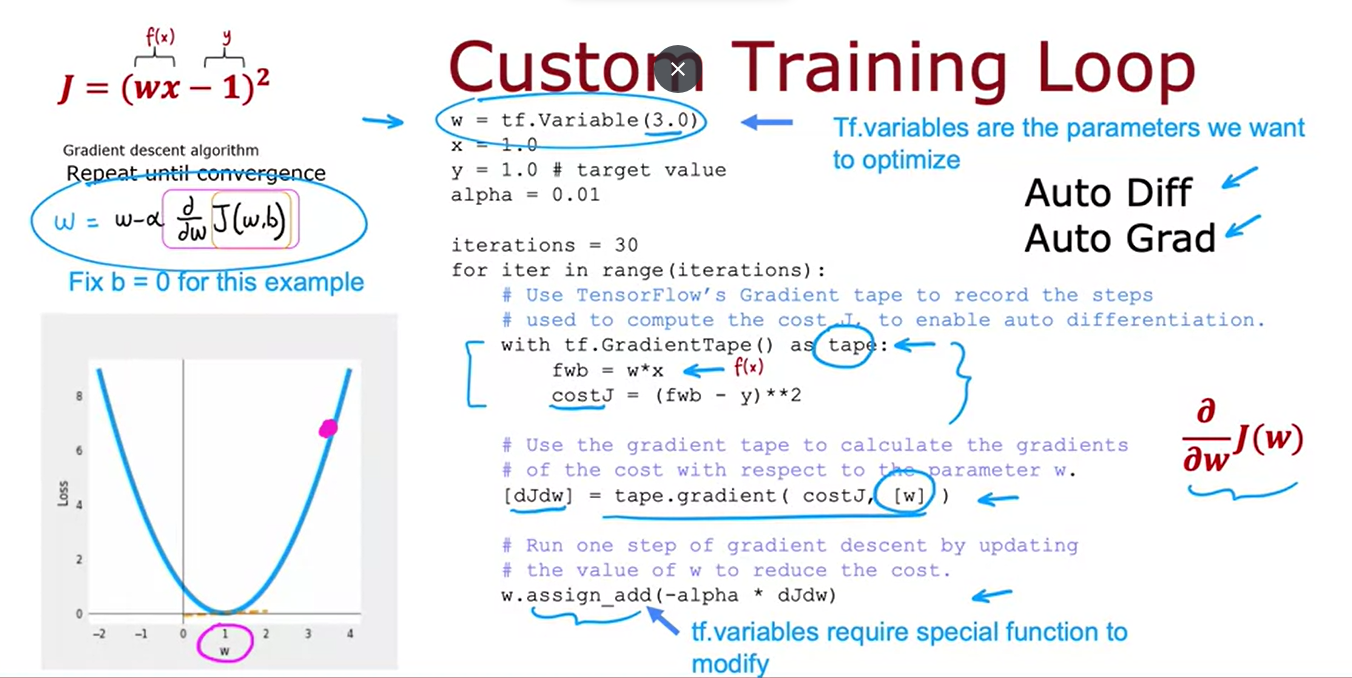

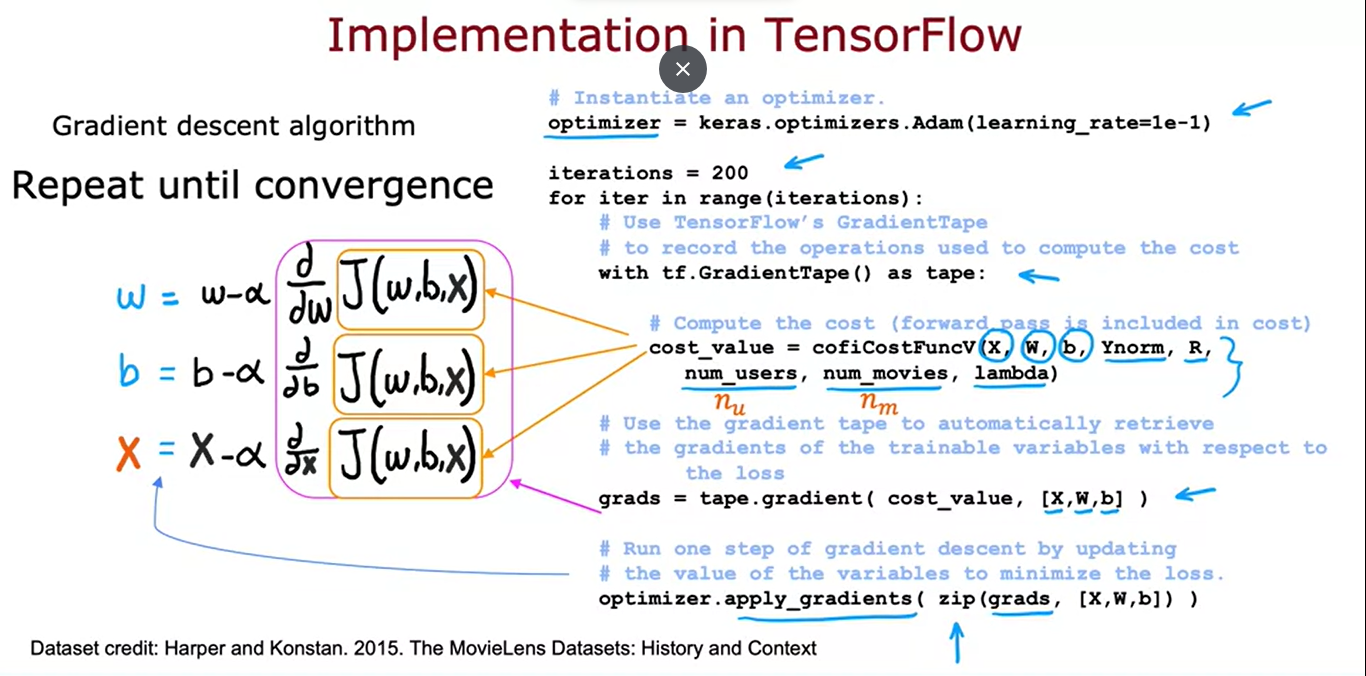

Dataset
Dataset yang digunakan adalah MovieLens Dataset, yang berisi film yang dinilai oleh pengguna nyata. Algoritma ini akan mengolah data tersebut dan memprediksi preferensi pengguna terhadap film.

Mengapa Harus Menggunakan Cara Ini?
Mengapa kita tidak menggunakan layer Dense dan metode seperti model.compile() dan model.fit()? Hal ini karena collaborative filtering dan cost function-nya tidak sesuai dengan jenis layer yang biasa digunakan pada neural networks. Oleh karena itu, kita perlu mengimplementasikan cost function secara manual, namun tetap bisa memanfaatkan fitur Auto Diff dan Adam Optimizer dari TensorFlow untuk mengoptimalkan cost function.

Meskipun model Anda tidak berupa rangkaian dense neural networks, alat-alat ini tetap memberikan cara yang sangat efektif untuk mengimplementasikan algoritma pembelajaran lainnya.

Kesimpulan
Itulah cara mengimplementasikan collaborative filtering algorithm di TensorFlow. Pada lab praktik berikutnya, Anda akan mengerjakan dataset nyata dan melihat hasil algoritma ini sendiri. Jangan khawatir dengan banyaknya kode, pastikan Anda mengikuti langkah-langkahnya dan sukses menyelesaikan latihan tersebut.